# Assignment 3

## 1.

### a)

- **For $e = 0$**:
  - Cannot sell a carpet ($p(0) = 0$), so the excitement level doesn't increase.
  - Cannot decrease below level 0, so the excitement level stays the same when he fails to sell.
  - **Transition**: $M[0][0] = 1$.

- **For $e = 1$ to $8$**:
  - Probability of selling: $p(e) = \frac{e}{10}$, moves to state $e+1$.
  - Probability of not selling: $1 - p(e)$, moves to state $e-1$.
  - **Transitions**:
    - $M[e][e+1] = p(e)$.
    - $M[e][e-1] = 1 - p(e)$.

- **For $e = 9$**:
  - Cannot increase excitement beyond level 9, so if he sells, he stays at level 9.
  - Probability of not selling: $1 - p(9) = 0.1$, moves to state $8$.
  - **Transitions**:
    - $M[9][9] = p(9) = 0.9$.
    - $M[9][8] = 0.1$.

\begin{pmatrix}
1.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.9 & 0.0 & 0.1 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.8 & 0.0 & 0.2 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.7 & 0.0 & 0.3 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.6 & 0.0 & 0.4 & 0.0 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.5 & 0.0 & 0.5 & 0.0 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.4 & 0.0 & 0.6 & 0.0 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.3 & 0.0 & 0.7 & 0.0 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.2 & 0.0 & 0.8 \\
0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.1 & 0.9 \\
\end{pmatrix}

### b)

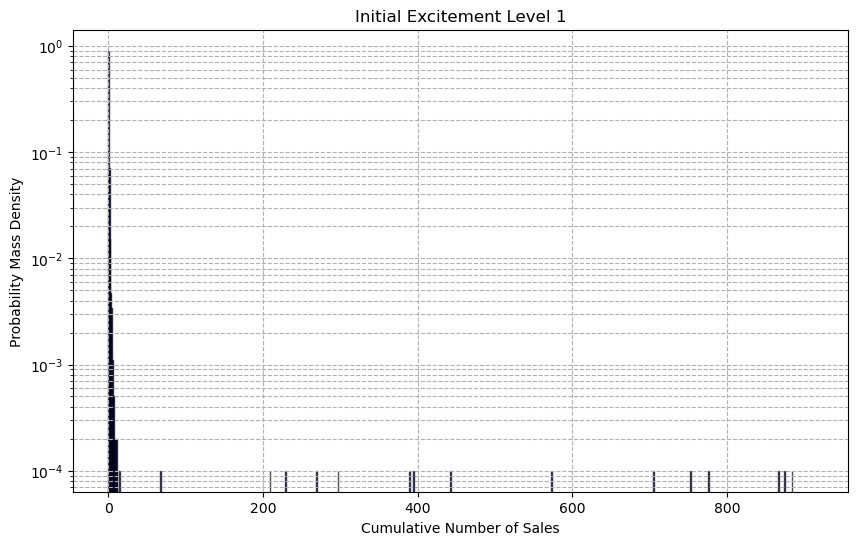

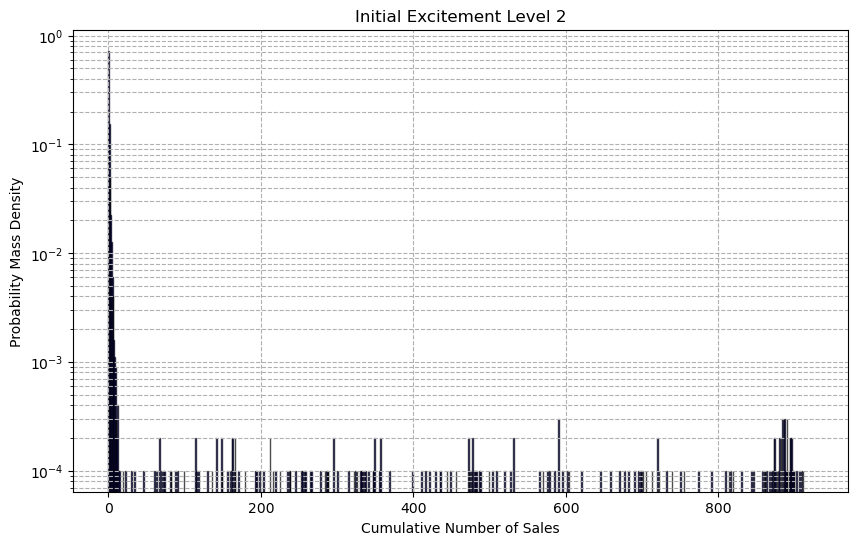

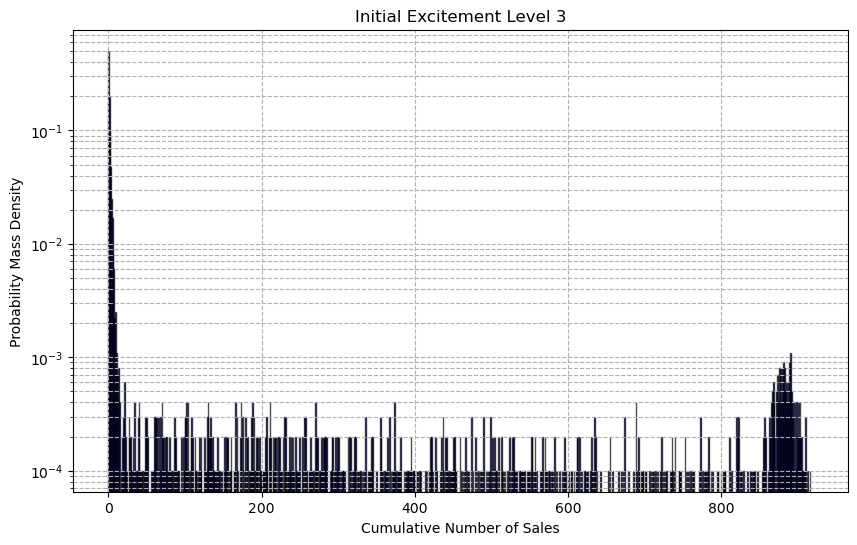

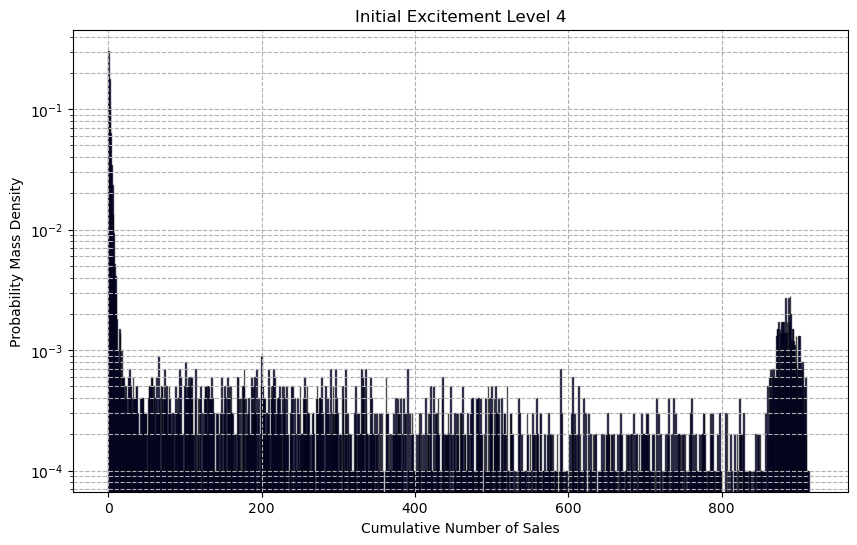

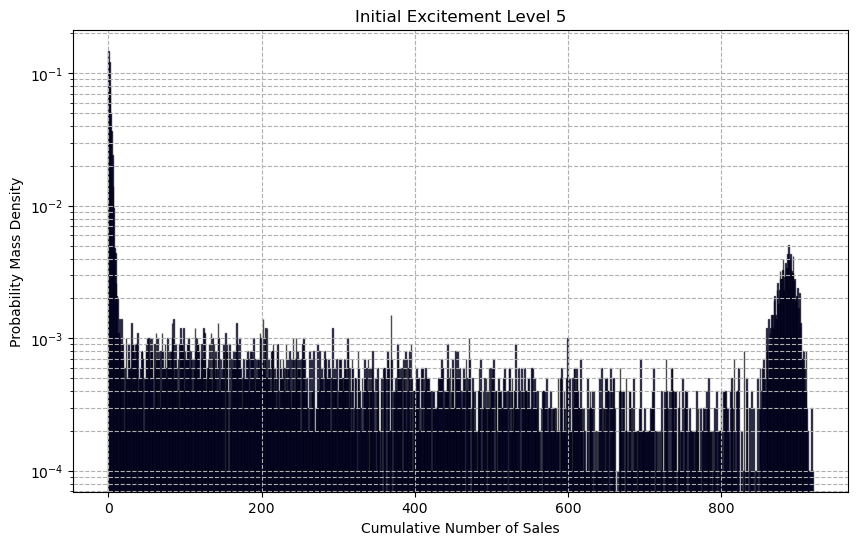

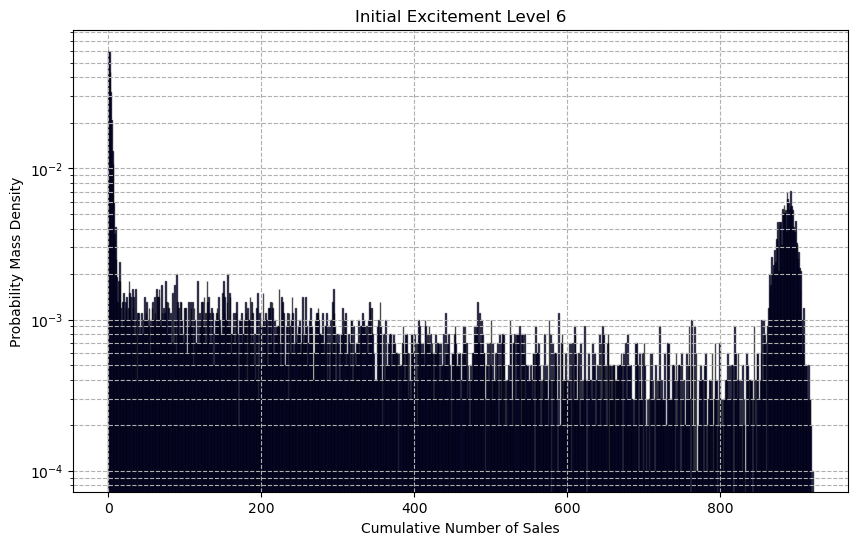

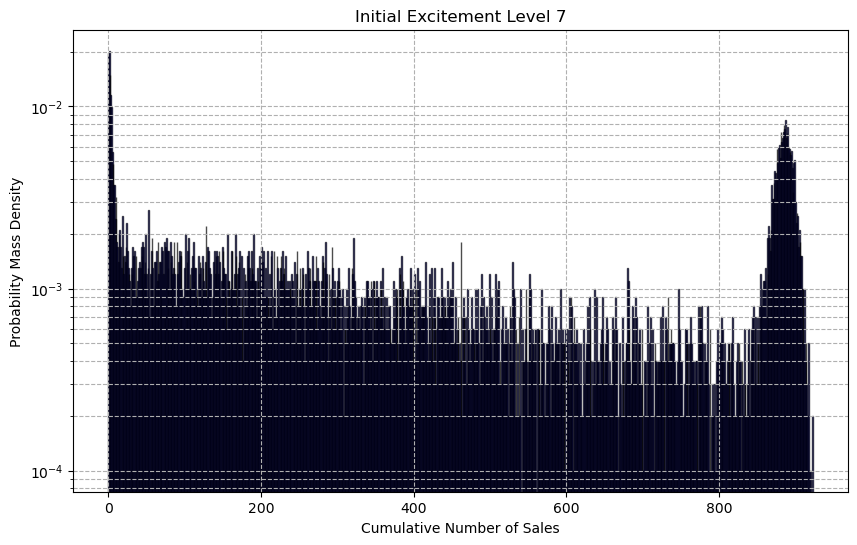

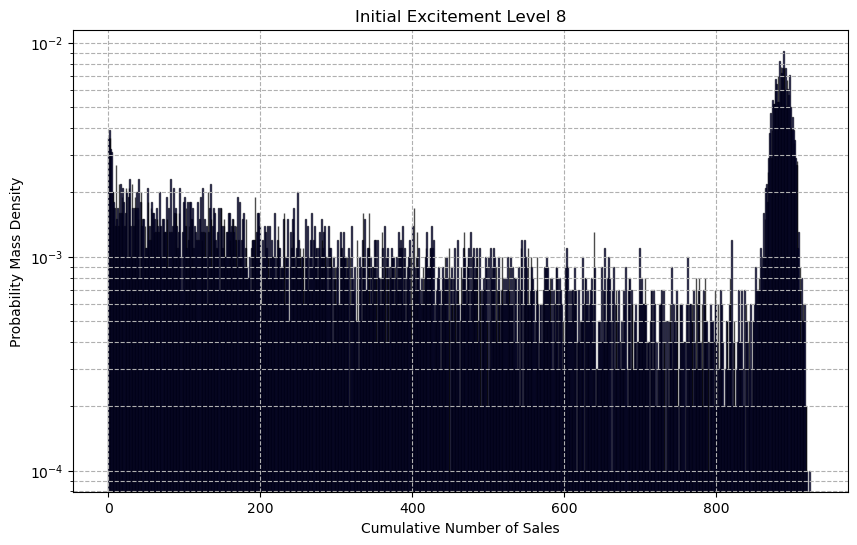

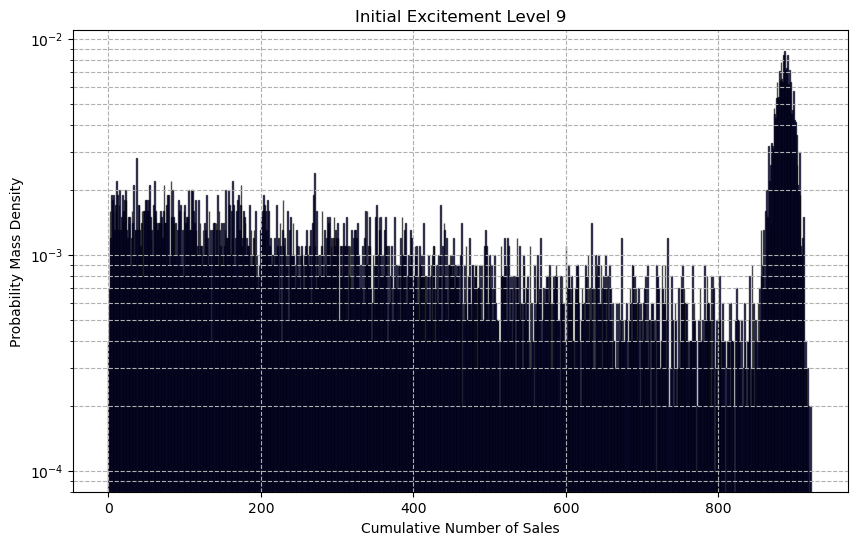

In [29]:
import numpy as np
import matplotlib.pyplot as plt

M = [
    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.7, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.6, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.6, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.7, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.8],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.9] 
]

def simulate_sales(M, initial_level, T, num_simulations):
    cumulative_sales = np.zeros(num_simulations, dtype=int)
    for sim in range(num_simulations):
        excitement_level = initial_level
        sales = 0
        for t in range(T):
            p_sell = excitement_level / 10 if excitement_level > 0 else 0
            if np.random.rand() < p_sell:
                sales += 1
                if excitement_level < 9:
                    excitement_level += 1
            else:
                if excitement_level > 0:
                    excitement_level -= 1
        cumulative_sales[sim] = sales
    return cumulative_sales

def plot_histogram(cumulative_sales, initial_level):
    plt.figure(figsize=(10, 6))
    bins = np.arange(cumulative_sales.min(), cumulative_sales.max() + 1) - 0.5
    plt.hist(cumulative_sales, bins=bins, density=True, alpha=0.7, color='blue', edgecolor='black')
    plt.yscale('log')  # Logarithmic scale on y-axis
    plt.xlabel('Cumulative Number of Sales')
    plt.ylabel('Probability Mass Density')
    plt.title(f'Initial Excitement Level {initial_level}')
    plt.grid(True, which="both", ls="--")
    plt.show()

T = 1000               # Time period (sales events)
num_simulations = 10000  # Number of simulations (trips)

for initial_level in range(1, 10):
    cumulative_sales = simulate_sales(M, initial_level, T, num_simulations)
    plot_histogram(cumulative_sales, initial_level)

### c)

Excitement		Average Sales
1				1.064
2				9.2931
3				41.1425
4				120.9123
5				233.9636
6				339.8384
7				423.7643
8				453.379
9				454.3144


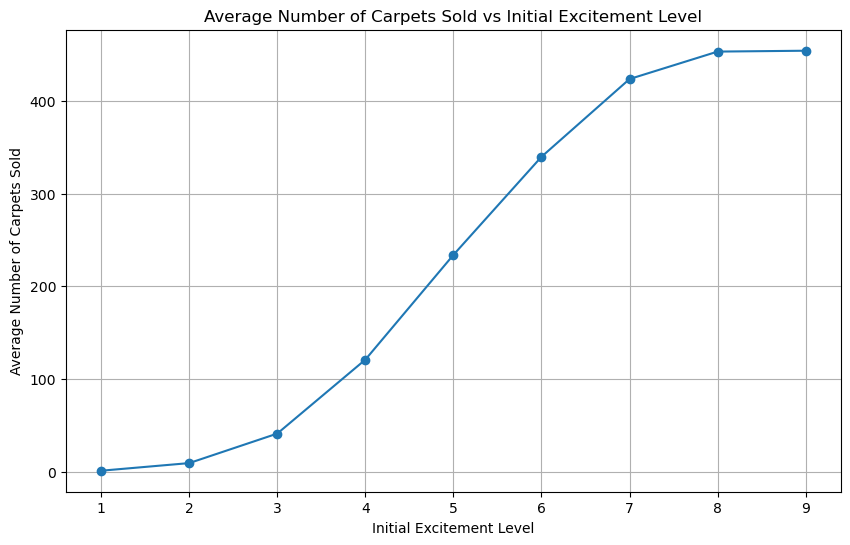

In [30]:
initial_levels = range(1, 10)
average_sales = []

print(f"Excitement\t\tAverage Sales")
for initial_level in initial_levels:
    cumulative_sales = simulate_sales(M, initial_level, T, num_simulations)
    avg_sales = np.mean(cumulative_sales)
    average_sales.append(avg_sales)
    print(f"{initial_level}\t\t\t\t{avg_sales}")

plt.figure(figsize=(10, 6))
plt.plot(initial_levels, average_sales, marker='o', linestyle='-')
plt.xlabel('Initial Excitement Level')
plt.ylabel('Average Number of Carpets Sold')
plt.title('Average Number of Carpets Sold vs Initial Excitement Level')
plt.grid(True)
plt.show()


### d)

#### i.

Simulating for initial excitement level: 9
Number of successful runs (sold at least 5 carpets): 9964


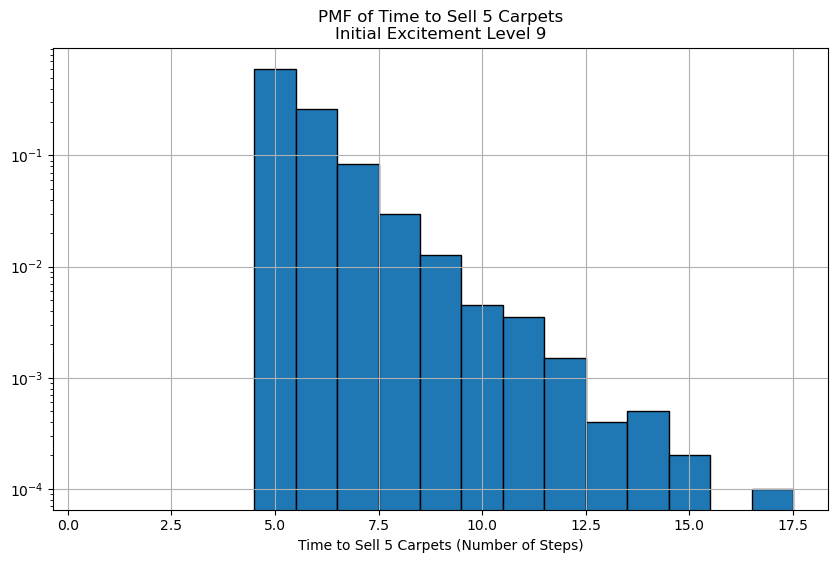

In [31]:
def simulate_times_to_sell_5(M, initial_level, T, num_simulations):
    times_to_sell_5 = []
    for sim in range(num_simulations):
        excitement_level = initial_level
        sales = 0
        time = 0
        while time < T and sales < 5:
            p_sell = excitement_level / 10 if excitement_level > 0 else 0
            if np.random.rand() < p_sell:
                sales += 1
                if excitement_level < 9:
                    excitement_level += 1
            else:
                if excitement_level > 0:
                    excitement_level -= 1
            time += 1
        if sales >= 5:
            times_to_sell_5.append(time)
    return times_to_sell_5

def plot_pmf(times_to_sell_5, initial_level):
    plt.figure(figsize=(10, 6))
    max_time = max(times_to_sell_5)
    bins = np.arange(1, max_time + 2) - 0.5  # Bin edges
    counts, bin_edges = np.histogram(times_to_sell_5, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.bar(bin_centers, counts, width=1, align='center', edgecolor='black')
    plt.xlabel('Time to Sell 5 Carpets (Number of Steps)')
    plt.title(f'PMF of Time to Sell 5 Carpets\nInitial Excitement Level {initial_level}')
    plt.grid(True)
    # plt.xscale('log')  # Using log scale for x-axis
    plt.yscale('log')  # Using log scale for y-axis

initial_level = 9
print(f"Simulating for initial excitement level: {initial_level}")
times_to_sell_5 = simulate_times_to_sell_5(M, initial_level, T, num_simulations)
num_successful_runs = len(times_to_sell_5)
print(f"Number of successful runs (sold at least 5 carpets): {num_successful_runs}")
if num_successful_runs > 0:
    plot_pmf(times_to_sell_5, initial_level)

#### ii.

A straight line on a semi log plot indicates an exponential distribution.

### e)

Simulating for initial excitement level: 1
Number of successful runs (sold at least 5 carpets): 40
Average time to sell 5 carpets: 6.10 steps
Simulating for initial excitement level: 2
Number of successful runs (sold at least 5 carpets): 350
Average time to sell 5 carpets: 6.75 steps
Simulating for initial excitement level: 3
Number of successful runs (sold at least 5 carpets): 1274
Average time to sell 5 carpets: 6.90 steps
Simulating for initial excitement level: 4
Number of successful runs (sold at least 5 carpets): 3157
Average time to sell 5 carpets: 7.01 steps
Simulating for initial excitement level: 5
Number of successful runs (sold at least 5 carpets): 5586
Average time to sell 5 carpets: 6.93 steps
Simulating for initial excitement level: 6
Number of successful runs (sold at least 5 carpets): 7767
Average time to sell 5 carpets: 6.58 steps
Simulating for initial excitement level: 7
Number of successful runs (sold at least 5 carpets): 9235
Average time to sell 5 carpets: 6.21 s

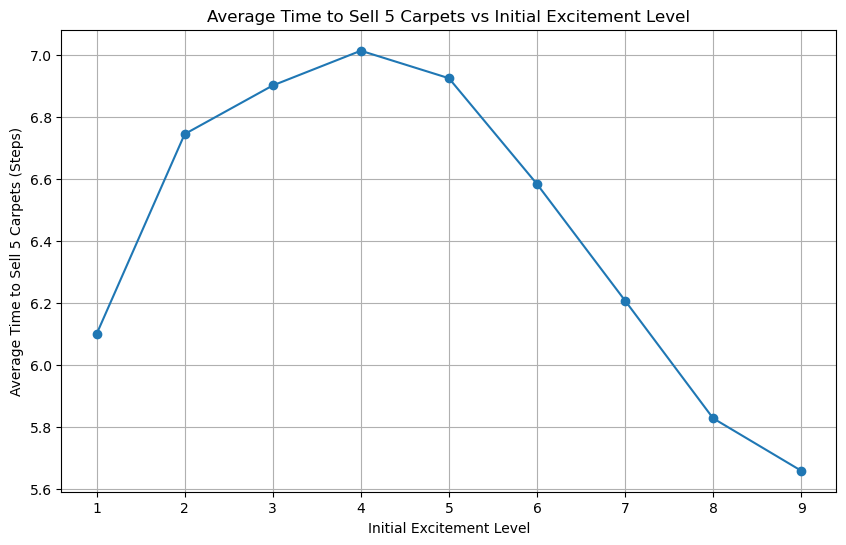

In [32]:
initial_levels = range(1, 10)
average_times = []
successful_run_counts = []

for initial_level in initial_levels:
    print(f"Simulating for initial excitement level: {initial_level}")
    times_to_sell_5 = simulate_times_to_sell_5(M, initial_level, T, num_simulations)
    num_successful_runs = len(times_to_sell_5)
    print(f"Number of successful runs (sold at least 5 carpets): {num_successful_runs}")
    if num_successful_runs > 0:
        avg_time = np.mean(times_to_sell_5)
        average_times.append(avg_time)
        successful_run_counts.append(num_successful_runs)
        print(f"Average time to sell 5 carpets: {avg_time:.2f} steps")
    else:
        average_times.append(None)
        successful_run_counts.append(0)
        print("No successful runs to compute average time.")

plt.figure(figsize=(10, 6))
valid_levels = [level for level, avg in zip(initial_levels, average_times) if avg is not None]
valid_avg_times = [avg for avg in average_times if avg is not None]

plt.plot(valid_levels, valid_avg_times, marker='o', linestyle='-')
plt.xlabel('Initial Excitement Level')
plt.ylabel('Average Time to Sell 5 Carpets (Steps)')
plt.title('Average Time to Sell 5 Carpets vs Initial Excitement Level')
plt.grid(True)
plt.show()

### f)

Simulating for initial excitement level: 1
Probability of selling fewer than 5 carpets: 0.9943
Simulating for initial excitement level: 2
Probability of selling fewer than 5 carpets: 0.9652
Simulating for initial excitement level: 3
Probability of selling fewer than 5 carpets: 0.8723
Simulating for initial excitement level: 4
Probability of selling fewer than 5 carpets: 0.6797
Simulating for initial excitement level: 5
Probability of selling fewer than 5 carpets: 0.4354
Simulating for initial excitement level: 6
Probability of selling fewer than 5 carpets: 0.2134
Simulating for initial excitement level: 7
Probability of selling fewer than 5 carpets: 0.0769
Simulating for initial excitement level: 8
Probability of selling fewer than 5 carpets: 0.0166
Simulating for initial excitement level: 9
Probability of selling fewer than 5 carpets: 0.0043


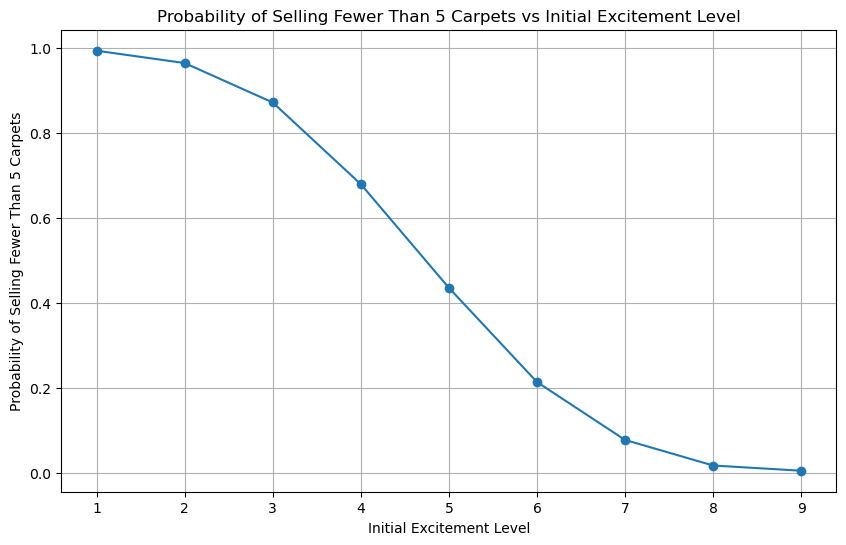

In [33]:
def simulate_less_than_5_sales(M, initial_level, T, num_simulations):
    less_than_5_sales_count = 0
    for sim in range(num_simulations):
        excitement_level = initial_level
        sales = 0
        time = 0
        while time < T and sales < 5:
            p_sell = excitement_level / 10 if excitement_level > 0 else 0
            if np.random.rand() < p_sell:
                sales += 1
                if excitement_level < 9:
                    excitement_level += 1
            else:
                if excitement_level > 0:
                    excitement_level -= 1
            time += 1
        if sales < 5:
            less_than_5_sales_count += 1
    probability = less_than_5_sales_count / num_simulations
    return probability

initial_levels = range(1, 10)
probabilities = []

for initial_level in initial_levels:
    print(f"Simulating for initial excitement level: {initial_level}")
    probability = simulate_less_than_5_sales(M, initial_level, T, num_simulations)
    probabilities.append(probability)
    print(f"Probability of selling fewer than 5 carpets: {probability:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(initial_levels, probabilities, marker='o', linestyle='-')
plt.xlabel('Initial Excitement Level')
plt.ylabel('Probability of Selling Fewer Than 5 Carpets')
plt.title('Probability of Selling Fewer Than 5 Carpets vs Initial Excitement Level')
plt.grid(True)
plt.show()

### g)

The process produces exponential distributions for the time to sell 5 carpets at high initial excitement levels because the salesman’s probability of making a sale remains approximately constant (memoryless process). The exponential distribution emerges due to the combination of high, stable excitement levels and the resulting constant probability of success in each time step. 

## 2.

### a)

In [34]:
def simulate_half_time(lambda_total, N0):
    t = 0  # Initialize time
    n_decay = 0  # Initialize decay count
    half_N0 = N0 // 2  # Half of the total nuclei

    while n_decay < half_N0:
        U = np.random.uniform(0, 1)  # Generate uniform random number
        delta_t = -np.log(U) / lambda_total  # Calculate inter-event time
        t += delta_t  # Update time
        n_decay += 1  # Increment decay count

    return t  # Return the half-time for this simulation

N0 = 10000
lambda_c = 0.2
lambda_total = lambda_c * N0  # Total decay rate

In [35]:
num_simulations = 1000
half_times = []

for _ in range(num_simulations):
    t_half = simulate_half_time(lambda_total, N0)
    half_times.append(t_half)

half_times = np.array(half_times)

mean_half_time = np.mean(half_times)
variance_half_time = np.var(half_times, ddof=1)  # Using sample variance

print(f"Mean Half-Time: {mean_half_time:.6f} seconds")
print(f"Variance of Half-Time: {variance_half_time:.6f} seconds^2")

Mean Half-Time: 2.499592 seconds
Variance of Half-Time: 0.001225 seconds^2


### b)

In [36]:
def simulate_half_time(N0, lambda_c):
    # Generate decay times for all nuclei
    U = np.random.uniform(0, 1, size=N0)  # Uniform random numbers
    T = -np.log(U) / lambda_c  # Exponential decay times
    # Sort the decay times
    T_sorted = np.sort(T)
    # Find the half-time (N0/2 th smallest decay time)
    half_index = N0 // 2  # Integer division
    T_half = T_sorted[half_index - 1]  # Zero-based indexing
    return T_half

In [37]:
N0 = 10000
lambda_c = 0.2

num_simulations = 1000
half_times = []

for _ in range(num_simulations):
    T_half = simulate_half_time(N0, lambda_c)
    half_times.append(T_half)

half_times = np.array(half_times)

mean_half_time = np.mean(half_times)
variance_half_time = np.var(half_times, ddof=1)  # Using sample variance

print(f"Mean Half-Time: {mean_half_time:.6f} seconds")
print(f"Variance of Half-Time: {variance_half_time:.6f} seconds^2")

Mean Half-Time: 3.463512 seconds
Variance of Half-Time: 0.002553 seconds^2
